---


**Name:** Jann Moises Nyll B. De los Reyes

**Section:** CPE22S3

**Date:** March 24, 2024

**Submitted to:** Engr. Roman M. Richard

---

# **Hands-on Activity 11.1 Linear Regression Analysis**

Objective(s):

>This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem
Links to an external site.

Intended Learning Outcomes (ILOs):

> Demonstrate how to solve regression problems using simple linear regression
Use the linear regression model to predict the target value

Resources:
> Jupyter Notebook

Files:

> Life Expectancy Data.csv

Submission Requirements:

* PDF containing initial EDA and Data Wrangling
* PDF showing demonstration of simple linear regression.
* Submit a link to the colab file through the comment section.

In [27]:
!pip install hvplot

In [28]:
# Import necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [29]:
# Check the data
df = pd.read_csv('/content/drive/MyDrive/Module 11/Life Expectancy Data.csv')

In [30]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [31]:
df.shape

(2938, 22)

In [51]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1_to_19_yrs',
       'thinness_5_to_9_yrs', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [33]:
df.isnull().sum() #count null values in every column in dataframe

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [34]:
df.columns = df.columns.str.strip() #delete some spaces in our columns in dataframe
df.info() # check if theres spaces in our  column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [35]:
df = df.rename(columns={'Adult Mortality': 'Adult_Mortality',
                        'Hepatitis B': 'Hepatitis_B',
                        'Total expenditure': 'Total_expenditure',
                        'thinness  1-19 years': 'thinness_1_to_19_yrs',
                        'thinness 5-9 years': 'thinness_5_to_9_yrs',
                        'Income composition of resources' : 'Income_composition_of_resources',
                        'Life expectancy' : 'Life_expectancy'
                       })

#Rename some columns in our dataframe
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [36]:
#Fill the missing values with mean in Adult_Mortality
df['Adult_Mortality'].fillna(np.mean(df['Adult_Mortality']),inplace=True)
#Fill the missing values with mean in Alcohol
df['Alcohol'].fillna(np.mean(df['Alcohol']),inplace=True)
#Fill the missing values with mean in Hepatitis_B
df['Hepatitis_B'].fillna(np.mean(df['Hepatitis_B']),inplace=True)
#Fill the missing values with mean in BMI
df['BMI'].fillna(np.mean(df['BMI']),inplace=True)
#Fill the missing values with mean in Polio
df['Polio'].fillna(np.mean(df['Polio']),inplace=True)
#Fill the missing values with mean in Total_expenditure
df['Total_expenditure'].fillna(np.mean(df['Total_expenditure']),inplace=True)
#Fill the missing values with mean in Diphtheria
df['Diphtheria'].fillna(np.mean(df['Diphtheria']),inplace=True)
#Fill the missing values with mean in GDP
df['GDP'].fillna(np.mean(df['GDP']),inplace=True)
#Fill the missing values with mean in Population
df['Population'].fillna(np.mean(df['Population']),inplace=True)
#Fill the missing values with mean in thinness_1_to_19_yrs
df['thinness_1_to_19_yrs'].fillna(np.mean(df['thinness_1_to_19_yrs']),inplace=True)
#Fill the missing values with mean in thinness_5_to_9_yrs
df['thinness_5_to_9_yrs'].fillna(np.mean(df['thinness_5_to_9_yrs']),inplace=True)
#Fill the missing values with mean in Income_composition_of_resources
df['Income_composition_of_resources'].fillna(np.mean(df['Income_composition_of_resources']),inplace=True)
#Fill the missing values with mean in Schooling
df['Schooling'].fillna(np.mean(df['Schooling']),inplace=True)
#Fill the missing values with mean in Life_expectancy
df['Life_expectancy'].fillna(np.mean(df['Life_expectancy']),inplace=True)

In [37]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [41]:
df['Status'] = df['Status'].replace({'Developing':0,'Developed':1}) #Change the multiple values of  a column using .replace()

In [42]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [47]:
df['Status'].value_counts() #check the Status

Status
0    2426
1     512
Name: count, dtype: int64

In [55]:
country = list(df['Country'].unique())
country

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Côte d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala'

In [57]:
country_dict = {country[i]: i for i in range(len(country))}
print(country_dict)

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Antigua and Barbuda': 4, 'Argentina': 5, 'Armenia': 6, 'Australia': 7, 'Austria': 8, 'Azerbaijan': 9, 'Bahamas': 10, 'Bahrain': 11, 'Bangladesh': 12, 'Barbados': 13, 'Belarus': 14, 'Belgium': 15, 'Belize': 16, 'Benin': 17, 'Bhutan': 18, 'Bolivia (Plurinational State of)': 19, 'Bosnia and Herzegovina': 20, 'Botswana': 21, 'Brazil': 22, 'Brunei Darussalam': 23, 'Bulgaria': 24, 'Burkina Faso': 25, 'Burundi': 26, "Côte d'Ivoire": 27, 'Cabo Verde': 28, 'Cambodia': 29, 'Cameroon': 30, 'Canada': 31, 'Central African Republic': 32, 'Chad': 33, 'Chile': 34, 'China': 35, 'Colombia': 36, 'Comoros': 37, 'Congo': 38, 'Cook Islands': 39, 'Costa Rica': 40, 'Croatia': 41, 'Cuba': 42, 'Cyprus': 43, 'Czechia': 44, "Democratic People's Republic of Korea": 45, 'Democratic Republic of the Congo': 46, 'Denmark': 47, 'Djibouti': 48, 'Dominica': 49, 'Dominican Republic': 50, 'Ecuador': 51, 'Egypt': 52, 'El Salvador': 53, 'Equatorial Guinea': 54, 'Er

In [58]:
df['Country'] = df['Country'].replace(country_dict) #replace object  type to int

In [59]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


##**Explanatory Data Analysis**

In [60]:
df.describe()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.091219,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,56.250042,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,93.000000,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,145.000000,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [68]:
df.corr()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19_yrs,thinness_5_to_9_yrs,Income_composition_of_resources,Schooling
Country,1.000000,0.001350,0.032439,-0.013475,0.036221,-0.030985,-0.059199,-0.032465,-0.018031,-0.024164,...,0.018558,0.053273,-0.005541,0.089229,-0.015411,-0.014489,0.007174,0.021713,-0.023711,-0.025427
Year,0.001350,1.000000,-0.001864,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,...,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Status,0.032439,-0.001864,1.000000,0.481962,-0.315171,-0.112252,0.579371,0.454261,0.095642,-0.076955,...,0.220098,0.289985,0.216763,-0.148590,0.445911,-0.041091,-0.367934,-0.366297,0.457302,0.491444
Life_expectancy,-0.013475,0.169623,0.481962,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,...,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult_Mortality,0.036221,-0.078861,-0.315171,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,...,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.030985,-0.037415,-0.112252,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,...,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.059199,-0.048168,0.579371,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,...,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,-0.032465,0.031400,0.454261,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,...,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis_B,-0.018031,0.089398,0.095642,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,...,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.024164,-0.082493,-0.076955,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,...,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609


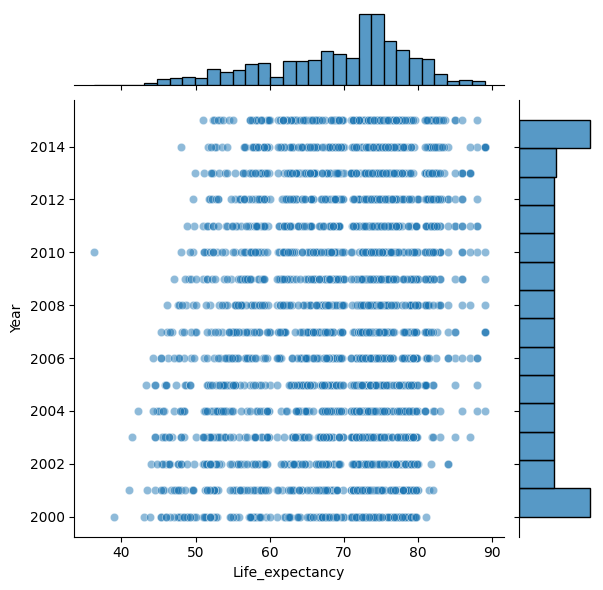

In [61]:
sns.jointplot(x='Life_expectancy', y='Year', data=df, alpha=0.5)

<Axes: >

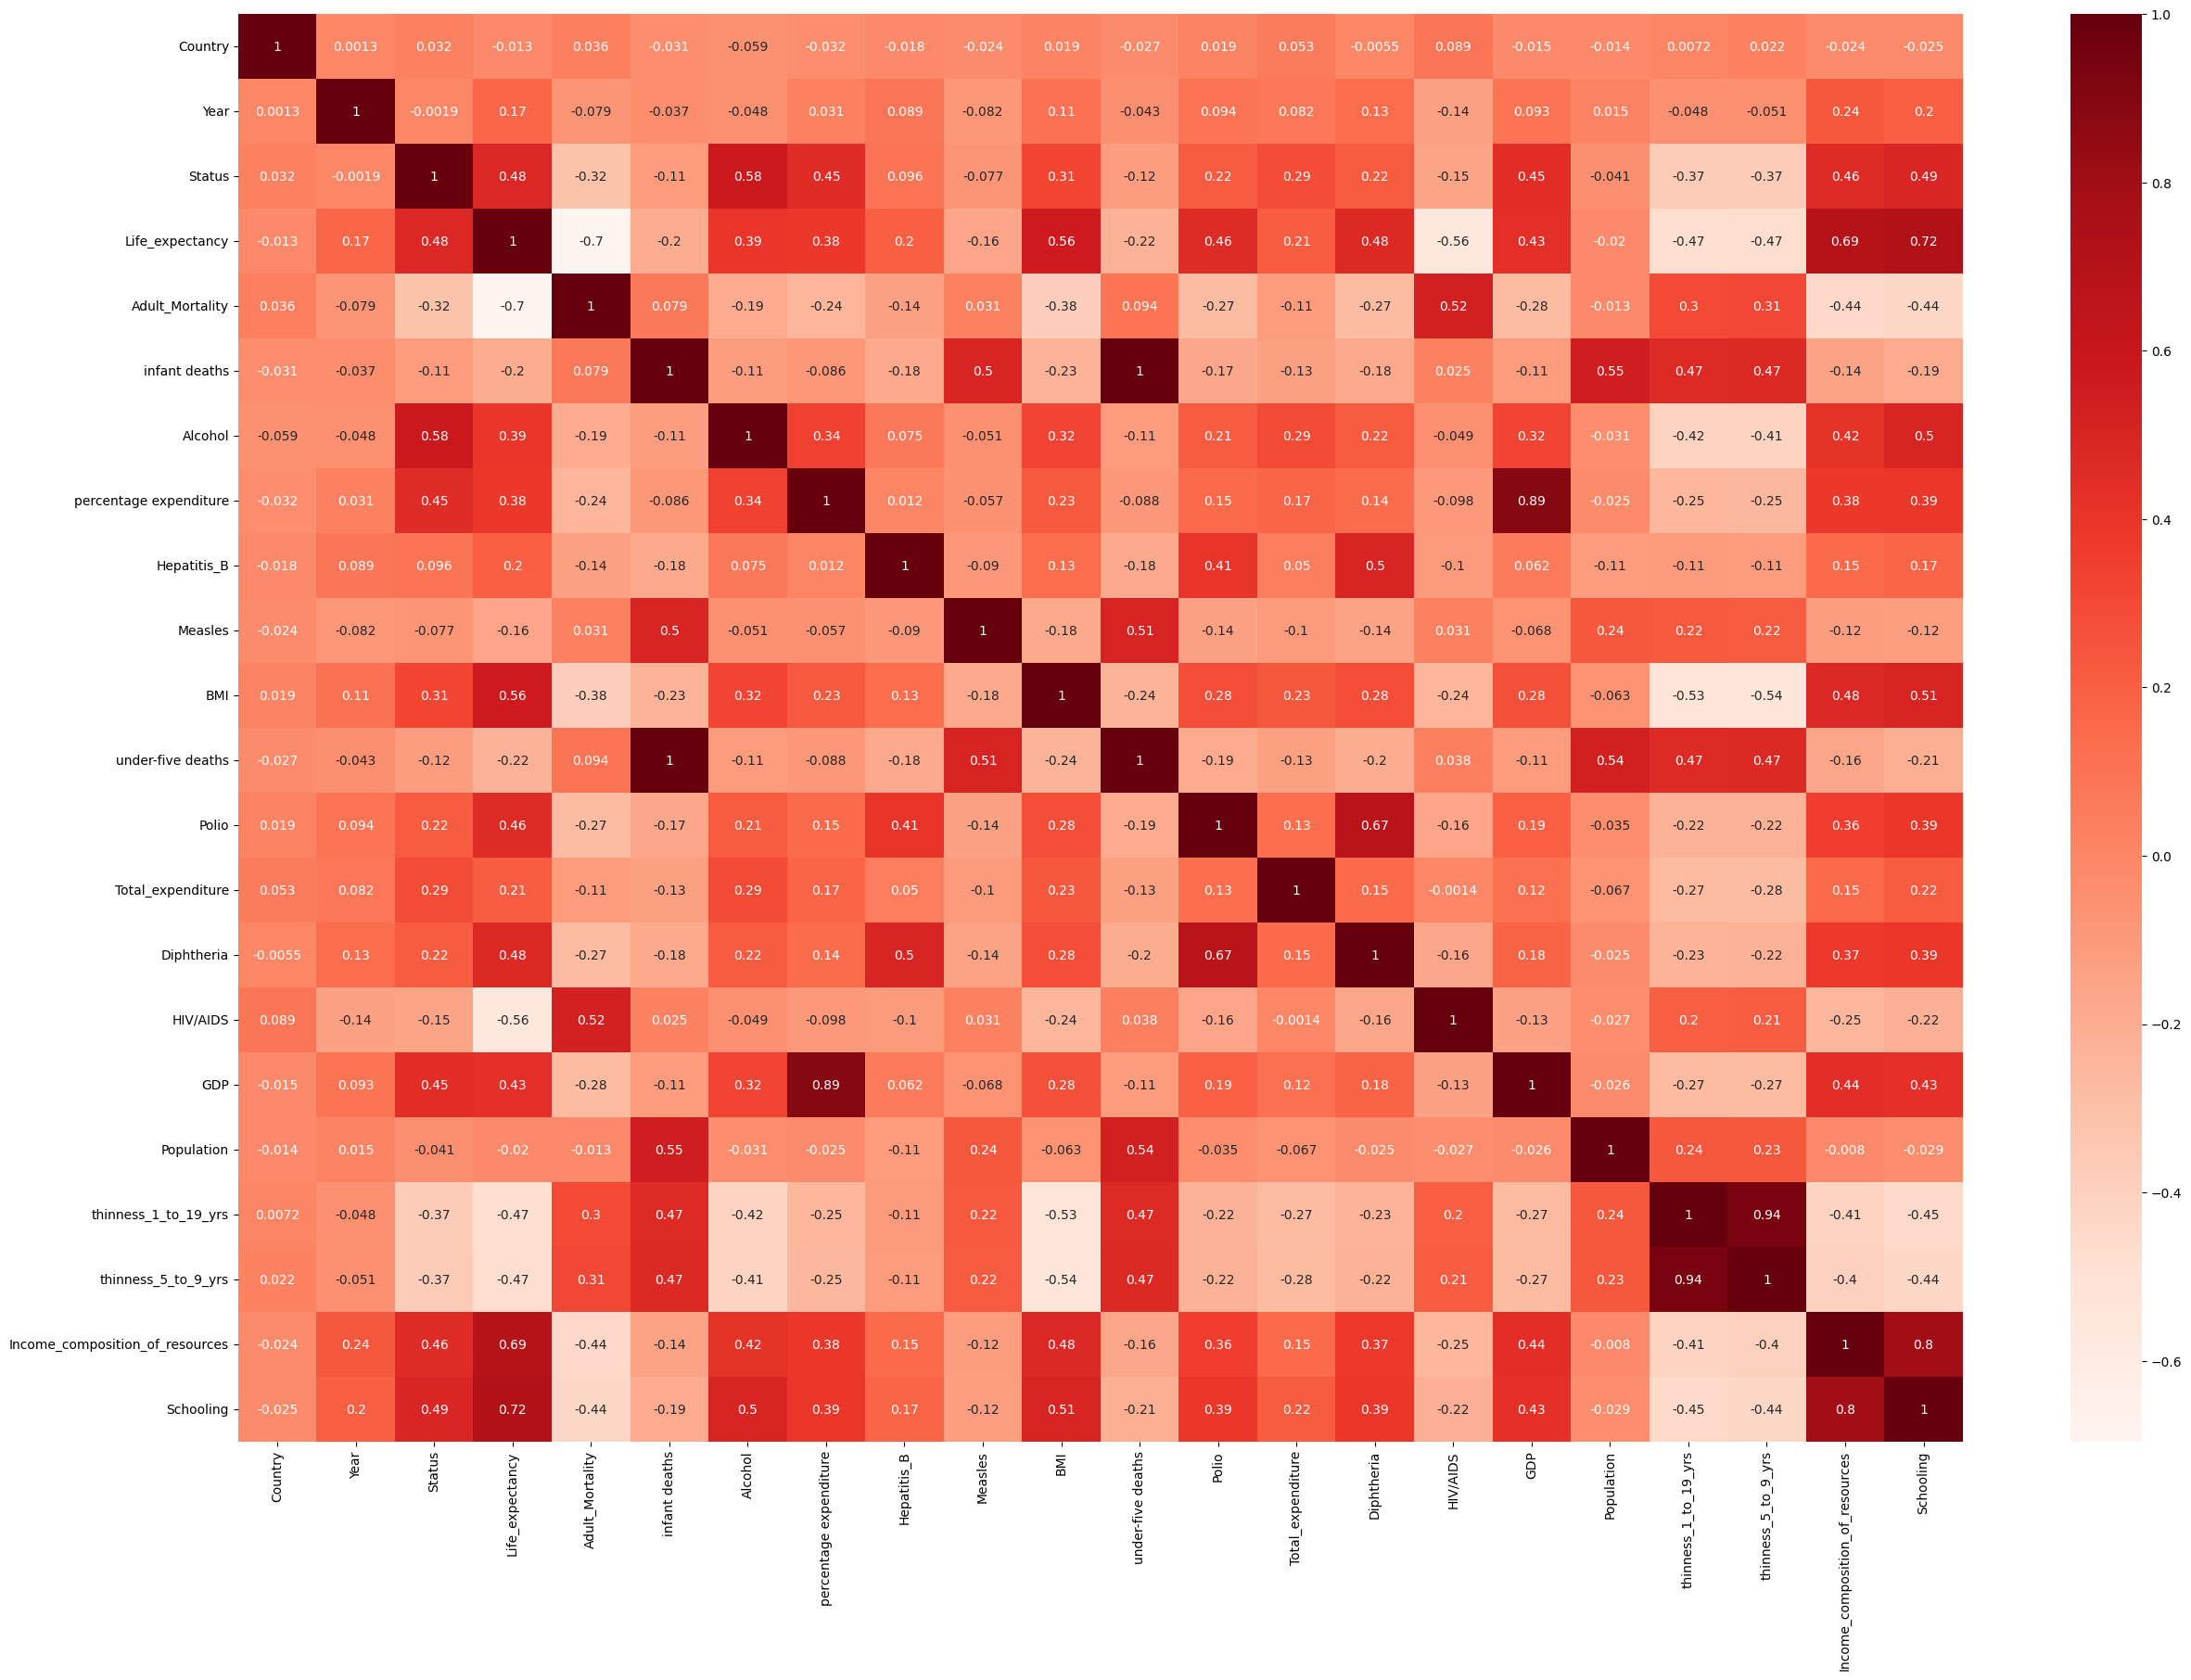

In [70]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot = True, cmap ='Reds')


# **Training  Linear Regression Model**

In [73]:
X = df[['Country', 'Year', 'Status', 'Adult_Mortality',
        'Alcohol', 'percentage expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1_to_19_yrs',
       'thinness_5_to_9_yrs', 'Income_composition_of_resources', 'Schooling']]
y= df['Life_expectancy']

In [74]:
print("X = ",X.shape,"\ny = ",y.shape)

X =  (2938, 21) 
y =  (2938,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [76]:
X_train.shape

(2056, 21)

In [77]:
X_test.shape

(882, 21)

# ✅ **Linear Regression**

In [ ]:
model.fit(X_train, y_train)